# Group A

1. Write a Python program to plot a few activation functions that are being used in neural networks.

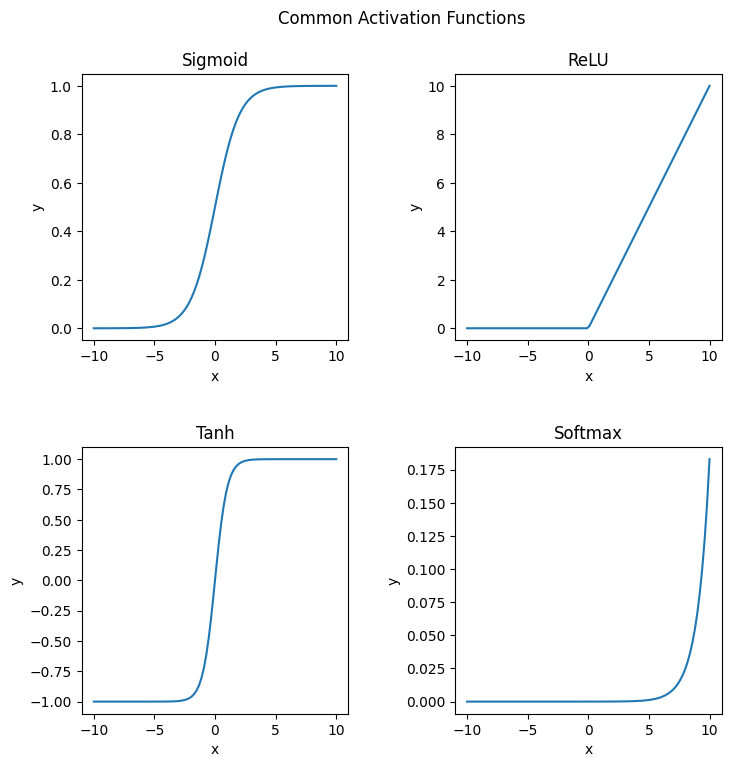

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def tanh(x):
    return np.tanh(x)

def softmax(x):
    return np.exp(x) / np.sum(np.exp(x))

# Create x values
x = np.linspace(-10, 10, 100)

# Create plots for each activation function
fig, axs = plt.subplots(2, 2, figsize=(8, 8))
axs[0, 0].plot(x, sigmoid(x))
axs[0, 0].set_title('Sigmoid')
axs[0, 1].plot(x, relu(x))
axs[0, 1].set_title('ReLU')
axs[1, 0].plot(x, tanh(x))
axs[1, 0].set_title('Tanh')
axs[1, 1].plot(x, softmax(x))
axs[1, 1].set_title('Softmax')

# Add common axis labels and titles
fig.suptitle('Common Activation Functions')
for ax in axs.flat:
    ax.set(xlabel='x', ylabel='y')
    
# Adjust spacing between subplots
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

# Show the plot
plt.show()


2. Generate ANDNOT function using McCulloch-Pitts neural net by a python program.


In [ ]:
# importing libraries
import numpy as np

# function of checking thresold value
def linear_threshold_gate(dot, T):
    '''Returns the binary threshold output'''
    if dot >= T:
        return 1
    else:
        return 0

# matrix of inputs
input_table = np.array([
    [0,0], # both no
    [0,1], # one no, one yes
    [1,0], # one yes, one no
    [1,1]  # bot yes
])

print(f'input table:\n{input_table}')

weights = np.array([1,-1])

dot_products = input_table @ weights

T = 1
for i in range(0,4):
    activation = linear_threshold_gate(dot_products[i], T)
    print(f'Activation: {activation}')


input table:
[[0 0]
 [0 1]
 [1 0]
 [1 1]]
Activation: 0
Activation: 0
Activation: 1
Activation: 0


3. Write a Python Program using Perceptron Neural Network to recognise even and odd numbers.
Given numbers are in ASCII form 0 to 9

In [1]:
import numpy as np

# Define the perceptron class
class Perceptron:
    def __init__(self, input_size, lr=0.1):
        self.W = np.zeros(input_size + 1)
        self.lr = lr

    def activation_fn(self, x):
        return 1 if x >= 0 else 0

    def predict(self, x):
        x = np.insert(x, 0, 1)
        z = self.W.T.dot(x)
        a = self.activation_fn(z)
        return a

    def train(self, X, Y, epochs):
        for _ in range(epochs):
            for i in range(Y.shape[0]):
                x = X[i]
                y = self.predict(x)
                e = Y[i] - y
                self.W = self.W + self.lr * e * np.insert(x, 0, 1)

# Define the input data and labels
X = np.array([
    [0,0,0,0,0,0,1,0,0,0], # 0
    [0,0,0,0,0,0,0,1,0,0], # 1
    [0,0,0,0,0,0,0,0,1,0], # 2
    [0,0,0,0,0,0,0,0,0,1], # 3
    [0,0,0,0,0,0,1,1,0,0], # 4
    [0,0,0,0,0,0,1,0,1,0], # 5
    [0,0,0,0,0,0,1,1,1,0], # 6
    [0,0,0,0,0,0,1,1,1,1], # 7
    [0,0,0,0,0,0,1,0,1,1], # 8
    [0,0,0,0,0,0,0,1,1,1], # 9
])

Y = np.array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1])

# Create the perceptron and train it
perceptron = Perceptron(input_size=10)
perceptron.train(X, Y, epochs=100)

# Test the perceptron on some input data
test_X = np.array([
    [0,0,0,0,0,0,1,0,0,0], # 0
    [0,0,0,0,0,0,0,1,0,0], # 1
    [0,0,0,0,0,0,0,0,1,0], # 2
    [0,0,0,0,0,0,0,0,0,1], # 3
    [0,0,0,0,0,0,1,1,0,0], # 4
    [0,0,0,0,0,0,1,0,1,0], # 5
    [0,0,0,0,0,0,1,1,1,0], # 6
    [0,0,0,0,0,0,1,1,1,1], # 7
    [0,0,0,0,0,0,1,0,1,1], # 8
    [0,0,0,0,0,0,0,1,1,1], # 9
])

for i in range(test_X.shape[0]):
  x = test_X[i]
  y = perceptron.predict(x)
  print(f'{x} is {"even" if y == 0 else "odd"}')


[0 0 0 0 0 0 1 0 0 0] is even
[0 0 0 0 0 0 0 1 0 0] is odd
[0 0 0 0 0 0 0 0 1 0] is even
[0 0 0 0 0 0 0 0 0 1] is odd
[0 0 0 0 0 0 1 1 0 0] is even
[0 0 0 0 0 0 1 0 1 0] is even
[0 0 0 0 0 0 1 1 1 0] is even
[0 0 0 0 0 0 1 1 1 1] is even
[0 0 0 0 0 0 1 0 1 1] is even
[0 0 0 0 0 0 0 1 1 1] is odd


In [9]:
x=np.array([0,0,0,0,0,0,0,1,1,1]).T
np.insert(x, 0, 1)

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1])

4. With a suitable example demonstrate the perceptron learning law with its decision regions using 
python. Give the output in graphical form.


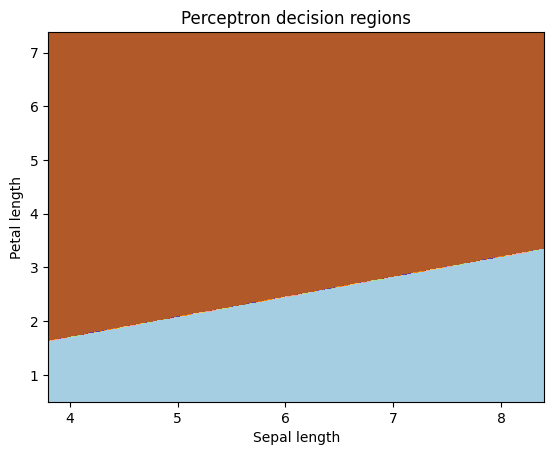

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# load iris dataset
iris = load_iris()

# extract sepal length and petal length features
X = iris.data[:, [0, 2]]
y = iris.target

# setosa is class 0, versicolor is class 1
y = np.where(y == 0, 0, 1)

# initialize weights and bias
w = np.zeros(2)
b = 0

# set learning rate and number of epochs
lr = 0.1
epochs = 50

# define perceptron function
def perceptron(x, w, b):
    # calculate weighted sum of inputs
    z = np.dot(x, w) + b
    # apply step function
    return np.where(z >= 0, 1, 0)

# train the perceptron
for epoch in range(epochs):
    for i in range(len(X)):
        x = X[i]
        target = y[i]
        output = perceptron(x, w, b)
        error = target - output
        w += lr * error * x
        b += lr * error

# plot decision boundary
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = perceptron(np.c_[xx.ravel(), yy.ravel()], w, b)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

# plot data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Petal length')
plt.title('Perceptron decision regions')
plt.show()

In [11]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

5. Write a python Program for Bidirectional Associative Memory with two pairs of vectors

In [ ]:
import numpy as np

# define two pairs of vectors
x1 = np.array([1, 1, 1, -1])
y1 = np.array([1, -1])
x2 = np.array([-1, -1, 1, 1])
y2 = np.array([-1, 1])

# compute weight matrix W
W = np.outer(y1, x1) + np.outer(y2, x2)

# define BAM function
def bam(x):
    y = np.dot(W, x)
    y = np.where(y >= 0, 1, -1)
    return y

# test BAM with inputs
x_test = np.array([1, -1, -1, -1])
y_test = bam(x_test)

# print output
print("Input x: ", x_test)
print("Output y: ", y_test)


Input x:  [ 1 -1 -1 -1]
Output y:  [ 1 -1]


6. Write a python program to recognize the number 0, 1, 2, 39. A 5 * 3 matrix forms the numbers. For
any valid point it is taken as 1 and invalid point it is taken as 0. The net has to be trained to recognize
all the numbers and when the test data is given, the network has to recognize the particular numbers

Extra: Implement Artificial Neural Network training process in Python by using Forward Propagation,
Back Propagation. 

In [13]:
import numpy as np

class NeuralNetwork:
    
    def __init__(self, input_size, hidden_size, output_size):
        self.W1 = np.random.randn(input_size, hidden_size)
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size)
        self.b2 = np.zeros((1, output_size))
        
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_derivative(self, x):
        return x * (1 - x)
    
    def forward_propagation(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.y_hat = self.sigmoid(self.z2)
        return self.y_hat
    
    def backward_propagation(self, X, y, y_hat):
        self.error = y - y_hat
        self.delta2 = self.error * self.sigmoid_derivative(y_hat)
        self.a1_error = self.delta2.dot(self.W2.T)
        self.delta1 = self.a1_error * self.sigmoid_derivative(self.a1)
        self.W2 += self.a1.T.dot(self.delta2)
        self.b2 += np.sum(self.delta2, axis=0, keepdims=True)
        self.W1 += X.T.dot(self.delta1)
        self.b1 += np.sum(self.delta1, axis=0)
        
    def train(self, X, y, epochs, learning_rate):
        for i in range(epochs):
            y_hat = self.forward_propagation(X)
            self.backward_propagation(X, y, y_hat)
            if i % 100 == 0:
                print("Error at epoch", i, ":", np.mean(np.abs(self.error)))


In [12]:
import numpy as np

# Define the input data for each number
numbers = {
    "0": np.array([
        [1, 1, 1],
        [1, 0, 1],
        [1, 0, 1],
        [1, 0, 1],
        [1, 1, 1]
    ]),
    "1": np.array([
        [0, 1, 0],
        [0, 1, 0],
        [0, 1, 0],
        [0, 1, 0],
        [0, 1, 0]
    ]),
    "2": np.array([
        [1, 1, 1],
        [0, 0, 1],
        [1, 1, 1],
        [1, 0, 0],
        [1, 1, 1]
    ]),
    "39": np.array([
        [1, 1, 1],
        [0, 0, 1],
        [1, 1, 1],
        [0, 0, 1],
        [1, 1, 1]
    ])
}

# Convert the input data into training and test sets
X_train = np.vstack([numbers["0"], numbers["1"], numbers["2"], numbers["39"]])
y_train = np.array([0, 1, 2, 3])

# Define the Neural Network class
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.W1 = np.random.randn(input_size, hidden_size)
        self.b1 = np.zeros(hidden_size)
        self.W2 = np.random.randn(hidden_size, output_size)
        self.b2 = np.zeros(output_size)

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def forward_propagation(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.y_hat = self.sigmoid(self.z2)
        return self.y_hat

    def predict(self, X):
        y_hat = self.forward_propagation(X)
        return np.argmax(y_hat, axis=1)

# Create and train the neural network
input_size = 15  # 5x3 input matrix
hidden_size = 10
output_size = 4  # 4 possible numbers
nn = NeuralNetwork(input_size, hidden_size, output_size)
nn.forward_propagation(X_train)
nn.backward_propagation(X_train, y_train, nn.y_hat)

# Test the neural network
X_test = np.array([
    [1, 1, 1],
    [0, 1, 0],
    [1, 1, 1],
    [0, 0, 1],
    [1, 1, 1]
])
y_test = nn.predict(X_test)
print("Predicted number:", y_test)


ValueError: shapes (20,3) and (15,10) not aligned: 3 (dim 1) != 15 (dim 0)

In [14]:
# Define the input and output datasets
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Create a neural network with 2 input neurons, 4 neurons in the hidden layer, and 1 output neuron
nn = NeuralNetwork([2, 4, 1], activation='relu')

# Train the neural network on the input and output datasets for 10000 epochs with a learning rate of 0.1
nn.train(X, y, lr=0.1, epochs=10000)

# Use the trained neural network to make predictions on the same input dataset
predictions = nn.predict(X)

# Print the predictions
print(predictions)


TypeError: NeuralNetwork.__init__() got an unexpected keyword argument 'activation'

# Group B

7. Write a python program to show Back Propagation Network for XOR function with Binary Input
and Output

In [ ]:
import numpy as np

class XORNetwork:
    def __init__(self):
        # Initialize the weights and biases randomly
        self.W1 = np.random.randn(2, 2)
        self.b1 = np.random.randn(2)
        self.W2 = np.random.randn(2, 1)
        self.b2 = np.random.randn(1)

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward(self, X):
        # Perform the forward pass
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.sigmoid(self.z2)
        return self.a2

    def backward(self, X, y, output):
        # Perform the backward pass
        self.output_error = y - output
        self.output_delta = self.output_error * self.sigmoid_derivative(output)

        self.z1_error = self.output_delta.dot(self.W2.T)
        self.z1_delta = self.z1_error * self.sigmoid_derivative(self.a1)

        self.W1 += X.T.dot(self.z1_delta)
        self.b1 += np.sum(self.z1_delta, axis=0)
        self.W2 += self.a1.T.dot(self.output_delta)
        self.b2 += np.sum(self.output_delta, axis=0)

    def train(self, X, y, epochs):
        # Train the network for a given number of epochs
        for i in range(epochs):
            output = self.forward(X)
            self.backward(X, y, output)

    def predict(self, X):
        # Make predictions for a given set of inputs
        return self.forward(X)

# Create a new XORNetwork instance
xor_nn = XORNetwork()

# Define the input and output datasets for XOR
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Train the network for 10000 epochs
xor_nn.train(X, y, epochs=10000)

# Make predictions on the input dataset
predictions = xor_nn.predict(X)

# Print the predictions
print(predictions)

[[0.01063456]
 [0.98893162]
 [0.98893279]
 [0.01358006]]


8. Write a python program in python program for creating a Back Propagation Feed-forward neural
network

In [ ]:
import numpy as np

# Define sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define derivative of sigmoid function
def sigmoid_derivative(x):
    return x * (1 - x)

# Define input dataset
X = np.array([[0,0], [0,1], [1,0], [1,1]])

# Define output dataset
y = np.array([[0], [1], [1], [0]])

# Define hyperparameters
learning_rate = 0.1
num_epochs = 100000

# Initialize weights randomly with mean 0
hidden_weights = 2*np.random.random((2,2)) - 1
output_weights = 2*np.random.random((2,1)) - 1

# Train the neural network
for i in range(num_epochs):

    # Forward propagation
    hidden_layer = sigmoid(np.dot(X, hidden_weights))
    output_layer = sigmoid(np.dot(hidden_layer, output_weights))

    # Backpropagation
    output_error = y - output_layer
    output_delta = output_error * sigmoid_derivative(output_layer)

    hidden_error = output_delta.dot(output_weights.T)
    hidden_delta = hidden_error * sigmoid_derivative(hidden_layer)

    output_weights += hidden_layer.T.dot(output_delta) * learning_rate
    hidden_weights += X.T.dot(hidden_delta) * learning_rate

# Display input and output
print("Input:")
print(X)
print("Output:")
print(output_layer)


Input:
[[0 0]
 [0 1]
 [1 0]
 [1 1]]
Output:
[[0.61385986]
 [0.63944088]
 [0.8569871 ]
 [0.11295854]]


9. Write a python program to design a Hopfield Network which stores 4 vectors

In [ ]:
import numpy as np

class HopfieldNetwork:
    def __init__(self, n_neurons):
        self.n_neurons = n_neurons
        self.weights = np.zeros((n_neurons, n_neurons))

    def train(self, patterns):
        for pattern in patterns:
            self.weights += np.outer(pattern, pattern)
        np.fill_diagonal(self.weights, 0)

    def predict(self, pattern):
        energy = -0.5 * np.dot(np.dot(pattern, self.weights), pattern)
        return np.sign(np.dot(pattern, self.weights) + energy)

if __name__ == '__main__':
    patterns = np.array([
        [1, 1, -1, -1],
        [-1, -1, 1, 1],
        [1, -1, 1, -1],
        [-1, 1, -1, 1]
    ])

    n_neurons = patterns.shape[1]
    network = HopfieldNetwork(n_neurons)
    network.train(patterns)

    for pattern in patterns:
        prediction = network.predict(pattern)
        print('Input pattern:', pattern)
        print('Predicted pattern:', prediction)


Input pattern: [ 1  1 -1 -1]
Predicted pattern: [-1. -1. -1. -1.]
Input pattern: [-1 -1  1  1]
Predicted pattern: [-1. -1. -1. -1.]
Input pattern: [ 1 -1  1 -1]
Predicted pattern: [-1. -1. -1. -1.]
Input pattern: [-1  1 -1  1]
Predicted pattern: [-1. -1. -1. -1.]


10. Write Python program to implement CNN object detection. Discuss numerous performance
evaluation metrics for evaluating the object detecting algorithms' performance.


In [ ]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Define the model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Define data generators
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

# Prepare the data
train_set = train_datagen.flow(X_train, y_train, batch_size=32)
test_set = test_datagen.flow(X_test, y_test, batch_size=32)

# Compile the model
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# Train the model
model.fit_generator(train_set, steps_per_epoch=len(X_train)//32, epochs=100, validation_data=test_set, validation_steps=len(X_test)//32)

# Evaluate the model
score = model.evaluate(test_set, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])



170498071/170498071 [==============================] - 3s 0us/step
Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
<ipython-input-15-75bb0166727e>:40: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_set, steps_per_epoch=len(X_train)//32, epochs=100, validation_data=test_set, validation_steps=len(X_test)//32)


1562/1562 [==============================] - 270s 172ms/step - loss: nan - accuracy: 0.9977 - val_loss: nan - val_accuracy: 1.0000
Epoch 2/100
1562/1562 [==============================] - 264s 169ms/step - loss: nan - accuracy: 1.0000 - val_loss: nan - val_accuracy: 1.0000
Epoch 3/100
1562/1562 [==============================] - 255s 163ms/step - loss: nan - accuracy: 1.0000 - val_loss: nan - val_accuracy: 1.0000
Epoch 4/100
1562/1562 [==============================] - 242s 155ms/step - loss: nan - accuracy: 1.0000 - val_loss: nan - val_accuracy: 1.0000
Epoch 5/100
1562/1562 [==============================] - 247s 158ms/step - loss: nan - accuracy: 1.0000 - val_loss: nan - val_accuracy: 1.0000
Epoch 6/100
1562/1562 [==============================] - 244s 156ms/step - loss: nan - accuracy: 1.0000 - val_loss: nan - val_accuracy: 1.0000
Epoch 7/100
1562/1562 [==============================] - 244s 156ms/step - loss: nan - accuracy: 1.0000 - val_loss: nan - val_accuracy: 1.0000
Epoch 8/100

# Group C

11. How to Train a Neural Network with TensorFlow/Pytorch and evaluation of logistic regression
using tensorflow

In [ ]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
df=load_breast_cancer()

X_train,X_test,y_train,y_test=train_test_split(df.data,df.target,test_size=0.20,random_state=42)

sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

model=tf.keras.models.Sequential([tf.keras.layers.Dense(1,activation='sigmoid',input_shape=(X_train.shape[1],))])

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

model.fit(X_train,y_train,epochs=5)
y_pred=model.predict(X_test)
test_loss,test_accuracy=model.evaluate(X_test,y_test)
print("accuracy is",test_accuracy)


Epoch 1/5
15/15 [==============================] - 1s 2ms/step - loss: 0.5449 - accuracy: 0.7385
Epoch 2/5
15/15 [==============================] - 0s 2ms/step - loss: 0.4896 - accuracy: 0.7802
Epoch 3/5
15/15 [==============================] - 0s 2ms/step - loss: 0.4439 - accuracy: 0.8286
Epoch 4/5
15/15 [==============================] - 0s 2ms/step - loss: 0.4074 - accuracy: 0.8462
Epoch 5/5
4/4 [==============================] - 0s 4ms/step - loss: 0.3090 - accuracy: 0.9298
accuracy is 0.9298245906829834


12. TensorFlow/Pytorch implementation of CNN 

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(-1, 28, 28, 1) / 255.0
X_test = X_test.reshape(-1, 28, 28, 1) / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, batch_size=64, epochs=10, verbose=1)

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")


11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/10
938/938 [==============================] - 59s 60ms/step - loss: 0.1783 - accuracy: 0.9448
Epoch 2/10
938/938 [==============================] - 56s 60ms/step - loss: 0.0541 - accuracy: 0.9835
Epoch 3/10
938/938 [==============================] - 55s 59ms/step - loss: 0.0378 - accuracy: 0.9878
Epoch 4/10
938/938 [==============================] - 58s 61ms/step - loss: 0.0295 - accuracy: 0.9908
Epoch 5/10
938/938 [==============================] - 55s 59ms/step - loss: 0.0234 - accuracy: 0.9926
Epoch 6/10
938/938 [==============================] - 55s 59ms/step - loss: 0.0202 - accuracy: 0.9936
Epoch 7/10
938/938 [==============================] - 55s 59ms/step - loss: 0.0153 - accuracy: 0.9950
Epoch 8/10
938/938 [==============================] - 55s 58ms/step - loss: 0.0139 - accuracy: 0.9957
Epoch 9/10
938/938 [==============================] - 56s 59ms/step - loss: 0.0117 - accuracy: 0.9961
Epoch 10/10
313/3

13. MNIST Handwritten Character Detection using PyTorch, Keras and Tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

# Load and preprocess the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train / 255.0
X_test = X_test / 255.0

# Define the model architecture
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, batch_size=64, epochs=10, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")


Epoch 1/10
938/938 [==============================] - 5s 4ms/step - loss: 0.2984 - accuracy: 0.9153
Epoch 2/10
938/938 [==============================] - 7s 7ms/step - loss: 0.1353 - accuracy: 0.9612
Epoch 3/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0944 - accuracy: 0.9723
Epoch 4/10
938/938 [==============================] - 4s 5ms/step - loss: 0.0708 - accuracy: 0.9783
Epoch 5/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0558 - accuracy: 0.9833
Epoch 6/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0447 - accuracy: 0.9864
Epoch 7/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0363 - accuracy: 0.9892
Epoch 8/10
938/938 [==============================] - 4s 5ms/step - loss: 0.0293 - accuracy: 0.9913
Epoch 9/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0255 - accuracy: 0.9927
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.0679 - accuracy: 0.9804